## 1. 데이터 불러오기

'1_훼손 영역에 대한 검출 가능성.ipynb'에서 생성한 데이터를 사용.

In [18]:
import os

DATA_PATH = "./data/"
DATA_LIST_PATH = f"{DATA_PATH}.datalist"

# --------------------------------

# 1. 불러와야 할 데이터들의 파일명 수집
if not os.path.exists(DATA_PATH): raise Exception("No data.")

file_basename_list = []

with open(DATA_LIST_PATH, "r") as f:
    file_basename_list = f.readlines()
    file_basename_list = [file_basename.rstrip() for file_basename in file_basename_list]

# --------------------------------

# 2. 데이터를 불러오는 함수
def load():
    for file_basename in file_basename_list:
        file_name, file_extension = os.path.splitext(file_basename)

        raw  = cv2.imread(f"{DATA_PATH}{file_basename}", cv2.IMREAD_COLOR)
        mask = cv2.imread(f"{DATA_PATH}{file_name}_mask{file_extension}", cv2.IMREAD_GRAYSCALE)

        if raw is None:
            raise Exception(f"Imread failed: {file_basename} from {file_basename_list}")

        yield raw, mask

## 2. 선호/비선호 - 정상/비정상 영역 판단

다음과 같이 레이블을 부여한다.

* 비선호: -1
* 선호:
    * 정상: 0
    * 비정상: 1



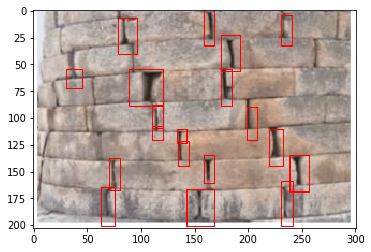

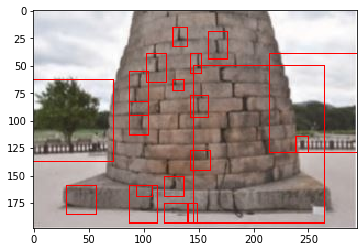

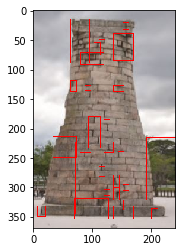

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

MIN_CONT_AREA = 20

label = {
    "non-prefer": 0,
    "prefer": {
        "normal": 1,
        "abnormal": 2
    }
}

# --------------------------------

for raw, mask in load():
    raw_w_bbox = raw.copy()

    for contour in cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]:
        is_abnormal = (cv2.contourArea(contour) >= MIN_CONT_AREA)

        if not is_abnormal: continue

        # Cut out
        x,y,w,h = cv2.boundingRect(contour)
        cx, cy, n = x+w/2, y+h/2, max(w,h)
        frame_cut = raw[int(cy-n/2):int(cy+n/2),
                        int(cx-n/2):int(cx+n/2)].copy()
        cv2.rectangle(raw_w_bbox, (x,y), (x+w,y+h), (0,0,255),1)

    plt.imshow(cv2.cvtColor(raw_w_bbox, cv2.COLOR_BGR2RGB))
    plt.show()

In [20]:

model = tf.keras.models.Sequential([
        Conv2D(
            filters=32,
            kernel_size=(5,5),
            padding='same',
            activation='relu',
            input_shape=input_shape),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Conv2D(
            filters=32,
            kernel_size=(3,3),
            padding='same',
            activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(
            128,
            activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

NameError: name 'tf' is not defined